# Logarithmic spiral

Figure 8.4 from Chapter 8 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Illustration of how to measure the pitch angle of a spiral. In this case, the constant pitch angle of the logarithmic spiral (dark gray) is $\psi_p=20^\circ$

In [4]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [5]:
plotFile = 'Fig8_4.png' 

# graphic aspect ratio = width/height

aspect = 1.0 # 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Logarithmic spiral

A logarithmic spiral with pitch angle $\psi_p$ is given by $R(\theta) = a a^{b\theta}$, where $b=\tan(\psi_p)$

Compute the spiral for a such that it intersects the unit circle after 3.25 turns for $\psi_p=20^\circ$.

In [6]:
psi_p = 20.0 # degrees
b = np.tan(np.radians(psi_p))

nTurns=4

theta = np.linspace(0,nTurns*2.0*np.pi,601)

theta0 = 3.25*2*np.pi + np.radians(psi_p)

a = np.exp(-b*theta0)

rSp = a*np.exp(b*theta)

# project into Cartesian coordinates

xSp = rSp*np.cos(theta)
ySp = rSp*np.sin(theta)

ytanPt = np.max(ySp)
xtanPt = xSp[np.where(ySp == ytanPt)]

# unit circle

xUnit = 1.0*np.cos(np.linspace(0,2.0*np.pi,301))
yUnit = 1.0*np.sin(np.linspace(0,2.0*np.pi,301))

# plotting limits

xMin = -2
xMax = 2
yMin = -2
yMax = 2

### Figure 6.3

Equal aspect plot, annotate with the pitch angle.

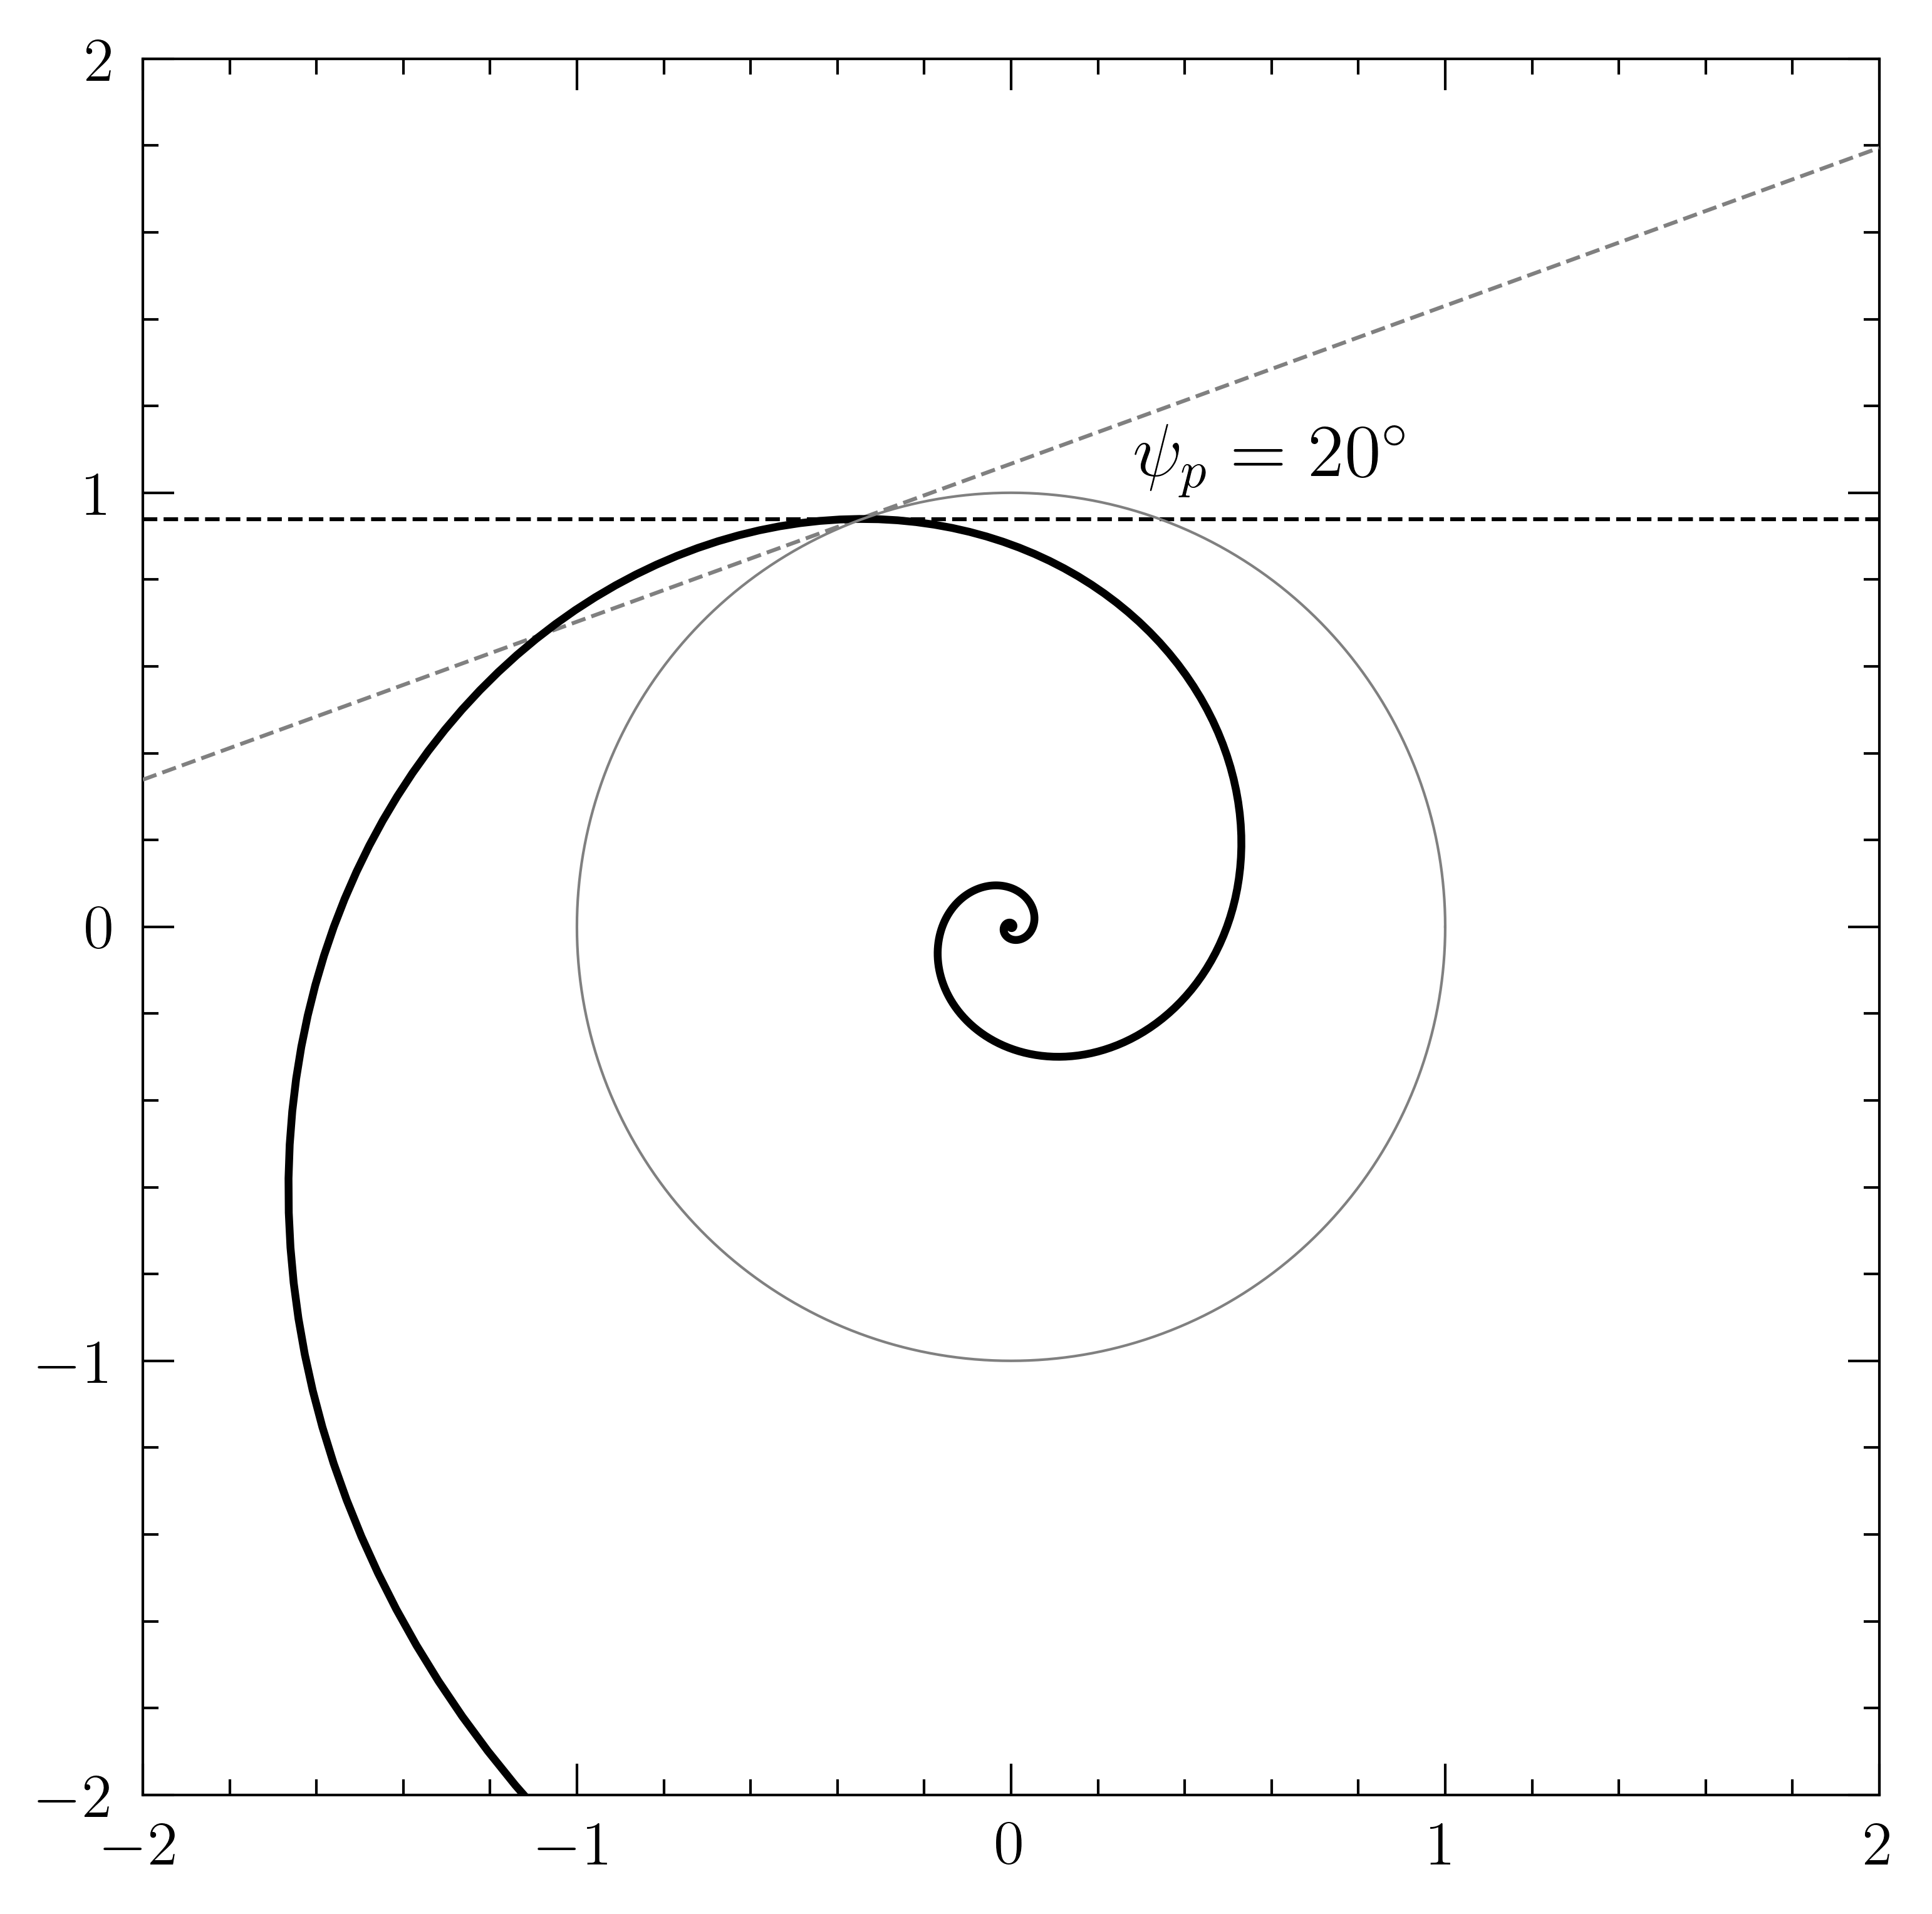

In [7]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_aspect('equal')

# Limits

ax.set_xlim(xMin,xMax)
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
#ax.set_xlabel(r'x',fontsize=axisFontSize)

ax.set_ylim(yMin,yMax)
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
#ax.set_ylabel(r'y',fontsize=axisFontSize)

ax.plot(xSp,ySp,ls='-',lw=1.5,color='black',zorder=10)
ax.plot(xUnit,yUnit,ls='-',lw=0.5,color='gray',zorder=10)

# pitch angle line

ax.hlines(ytanPt,xMin,xMax,ls=['--'],colors=['black'],lw=0.75,zorder=9)
ypMin = ytanPt - (xtanPt-xMin)*np.tan(np.radians(psi_p))
ypMax = ytanPt + (xMax-xtanPt)*np.tan(np.radians(psi_p))
ax.plot([xMin,xMax],[ypMin,ypMax],'--',lw=0.75,color='gray',zorder=8)

ax.text(0.6,1.075,rf'$\psi_p=20^\circ$',ha='center',va='center',fontsize=1.2*axisFontSize)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')